<a href="https://colab.research.google.com/github/m-aliabbas/PnuemoniaRefined/blob/master/RandomForestRes18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading  and Libraries Import

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls '/content/drive/My Drive/'

'14042020 (1).xlsx'
 14042020.gform
 14042020.gsheet
'14042020Part1Ali (1).gsheet'
 14042020Part1Ali.gsheet
 14042020.xlsx
 16042020.gsheet
 20170330_110326.jpg
'3_9_2018 11_47 Office Lens (1).jpg'
'3_9_2018 11_48 Office Lens.jpg'
'5th & 8th Grade Exam 2018.xlsx'
'5th & 8th Grade Exam 2018.xlsx.gsheet'
 aa.gsheet
 Aamir_resarch.gdoc
'Admission Information.xlsx'
'Advance AI Mid Term Revised.gdoc'
'AdvanceAI(TicTacToe)Assignment.gdoc'
'Ahmad Performa for the Result Comparison for last__________.gdoc'
 ahmed
'AIFinalPaper Mohammad Alli Abbas.gdoc'
'AI Models Details.gdoc'
 AIPaper.gdoc
 AlexNetActualPne1
 AlexNetLRPne1
 AlexNetPne
'Anomalies for remarks from DMO office.xlsx'
'AP 21 Manual.gdoc'
'AP_Data (10).gsheet'
'AP_Data (11).gsheet'
'AP_Data (12).gsheet'
'AP_Data (13).gsheet'
'AP_Data (14).gsheet'
'AP_Data (15).gsheet'
'AP_Data (16).gsheet'
'AP_Data (17).gsheet'
'AP_Data (18).gsheet'
'AP_Data (1).gsheet'
'AP_Data (2).gsheet'
'AP_Data (3).gsheet'
'AP_Data (4).gsheet'
'AP_Data (5).gshe

Importing Libararies

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the dataset


# Preprocessing Data

In [4]:
dataset = pd.read_csv('/content/drive/My Drive/dataset18New.csv')
dataset = pd.get_dummies(dataset)

In [5]:
dataset.shape

(5856, 513)

In [6]:
labels = np.array(dataset['label'])

In [7]:
dataset= dataset.drop('label', axis = 1)

In [8]:
feature_list = list(dataset.columns)

In [9]:
features = np.array(dataset)

In [10]:
features.shape

(5856, 512)

# Splitting to train and Test Set

# Training Random Forest Classifier

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
train_features = sc.fit_transform(train_features)  
test_features = sc.transform(test_features)  
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
clf1 = RandomForestClassifier(n_estimators=1200, max_depth=14,random_state=42,oob_score=True,min_weight_fraction_leaf=0.15)
# Train the model on training data
clf1.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.15, n_estimators=1200,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [34]:
dfTest = pd.read_csv('/content/drive/My Drive/dataset18NewTest.csv')

In [15]:
dfTest.shape

In [16]:
test_labels = np.array(dfTest['label'])

In [17]:
dfTest= dfTest.drop('label', axis = 1)

In [18]:
test_feature_list = list(dfTest.columns)

In [19]:
test_features = np.array(dfTest)

In [20]:
test_features.shape

# Testing on Unseen Data

In [35]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(test_labels, clf1.predict(test_features));
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(test_labels, clf1.predict(test_features)))  
print(classification_report(test_labels, clf1.predict(test_features)))  
print(accuracy_score(test_labels, clf1.predict(test_features)))  

[[159  18]
 [ 12 435]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       177
           1       0.96      0.97      0.97       447

    accuracy                           0.95       624
   macro avg       0.95      0.94      0.94       624
weighted avg       0.95      0.95      0.95       624

0.9519230769230769


In [36]:
prob=clf1.predict_proba(test_features)

In [37]:
from sklearn.metrics import roc_curve, auc
# probs from log preds
probs = np.exp(prob[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

ROC area is 0.9884730595684982


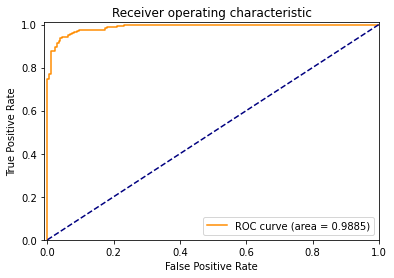

In [38]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [39]:
import seaborn
import matplotlib.pyplot as plt
 
 
def plot_confusion_matrix(data, labels, output_filename):
    """Plot confusion matrix using heatmap.
 
    Args:
        data (list of list): List of lists with confusion matrix data.
        labels (list): Labels which will be plotted across x and y axis.
        output_filename (str): Path to output file.
 
    """
    seaborn.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
 
    plt.title("Confusion Matrix")
 
    seaborn.set(font_scale=1.4)
    ax = seaborn.heatmap(data,  annot=True,fmt='g', cmap="YlGnBu", cbar_kws={'label': 'Scale'})
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(ylabel="True Label", xlabel="Predicted Label")
 
    plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    plt.close()
plot_confusion_matrix(conf, ["Normal","Pneumonia"], "RandomForestResnet18.png")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
